# 🌾 Soil Fertility Prediction using Deep Learning (Keras)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

## 📥 Load and Preprocess Data

In [2]:
df = pd.read_csv("Soil Fertility Data (Modified Data).csv")
X = df.drop(columns=['fertility'])
y = df['fertility']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_cat = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

## 🧠 Build and Train the Model

In [3]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4362 - loss: 1.0674 - val_accuracy: 0.6783 - val_loss: 0.8181
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6462 - loss: 0.8062 - val_accuracy: 0.7597 - val_loss: 0.5904
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7041 - loss: 0.6601 - val_accuracy: 0.8023 - val_loss: 0.5038
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7288 - loss: 0.5873 - val_accuracy: 0.7674 - val_loss: 0.4767
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7812 - loss: 0.5139 - val_accuracy: 0.8372 - val_loss: 0.4217
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7453 - loss: 0.5552 - val_accuracy: 0.8527 - val_loss: 0.4004
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7854 - loss: 0.4732 - val_accuracy: 0.8643 - val_loss: 0.3878
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7883 - loss: 0.4695 - val_accuracy: 0.8333 - val_loss

## 📈 Visualize Accuracy and Loss

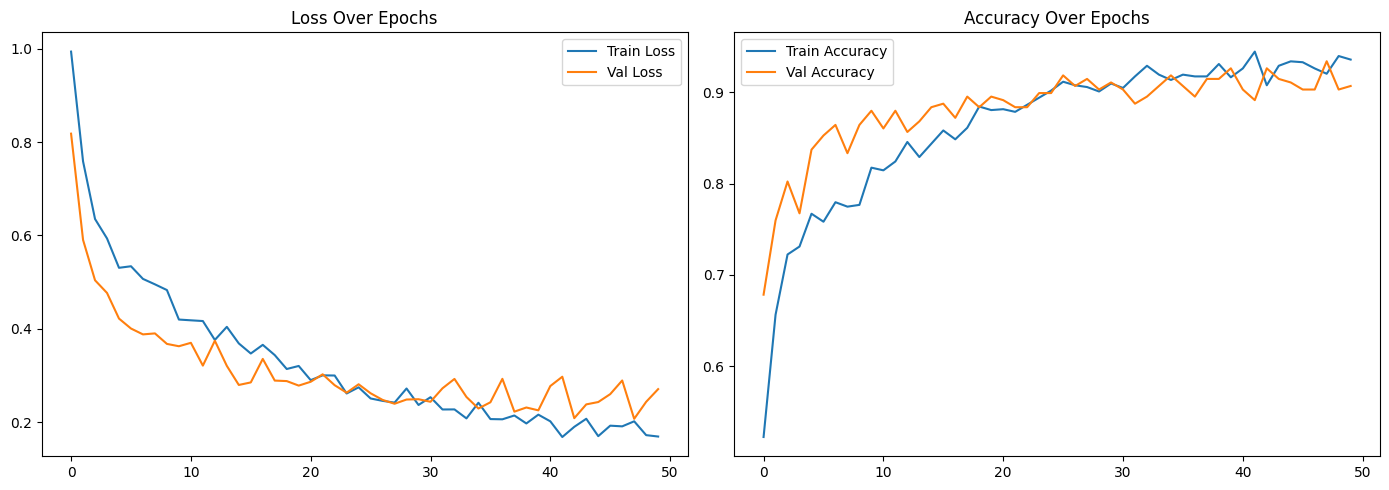

In [4]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.tight_layout()
plt.show()

## ✅ Evaluation & Confusion Matrix

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        86
           1       0.93      0.78      0.85        87
           2       0.85      1.00      0.92        85

    accuracy                           0.91       258
   macro avg       0.91      0.91      0.91       258
weighted avg       0.91      0.91      0.91       258



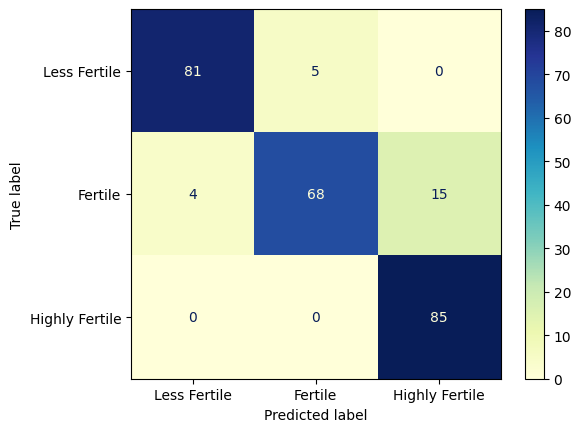

In [5]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Less Fertile", "Fertile", "Highly Fertile"])
disp.plot(cmap='YlGnBu')
plt.show()

## 💾 Save the Model

In [6]:
model.save("soil_fertility_dl_model.h5")
print("Model saved as soil_fertility_dl_model.h5")

Model saved as soil_fertility_dl_model.h5
